# Konut Fiyatları Tahmini Çalışması

Bu çalışma Ames, Iowa'daki konut evlerinin (neredeyse) her yönünü açıklayan 79 açıklayıcı değişkenli veri setinden konut fyatlarını tahmin edebilmeye yönelik makine öğrenmesi modeli oluşturulması çalışmasıdır. Çalışmada kullanılan veri seti https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques adresinden alınmıştır.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
import sklearn.metrics as mt
from lazypredict.Supervised import LazyRegressor
pd.options.display.max_rows=999
pd.options.display.max_columns=999
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,"2,003.00",RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,"1,976.00",RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,"2,001.00",RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,"1,998.00",Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,"2,000.00",RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.00,TA,TA,CBlock,TA,TA,No,Rec,468.00,LwQ,144.00,270.00,882.00,GasA,TA,Y,SBrkr,896,0,0,896,0.00,0.00,1,0,2,1,TA,5,Typ,0,NaN,Attchd,"1,961.00",Unf,1.00,730.00,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.00,TA,TA,CBlock,TA,TA,No,ALQ,923.00,Unf,0.00,406.00,"1,329.00",GasA,TA,Y,SBrkr,1329,0,0,1329,0.00,0.00,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,"1,958.00",Unf,1.00,312.00,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.00,TA,TA,PConc,Gd,TA,No,GLQ,791.00,Unf,0.00,137.00,928.00,GasA,Gd,Y,SBrkr,928,701,0,1629,0.00,0.00,2,1,3,1,TA,6,Typ,1,TA,Attchd,"1,997.00",Fin,2.00,482.00,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.00,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.00,TA,TA,PConc,TA,TA,No,GLQ,602.00,Unf,0.00,324.00,926.00,GasA,Ex,Y,SBrkr,926,678,0,1604,0.00,0.00,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,"1,998.00",Fin,2.00,470.00,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.00,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.00,Gd,TA,PConc,Gd,TA,No,ALQ,263.00,Unf,0.00,"1,017.00","1,280.00",GasA,Ex,Y,SBrkr,1280,0,0,1280,0.00,0.00,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,"1,992.00",RFn,2.00,506.00,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
# Id sütunlarını veri setlerinden atalım
train_df = train.drop('Id', axis=1)
test_df = test.drop('Id', axis=1)
train_df.shape

(1460, 80)

In [6]:
test_df.shape

(1459, 79)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 1. Boş Gözlemlerin Tespit Edilmesi

In [8]:
kayıp_yuzde=train_df.isnull().sum()/len(train_df)
kayıp_yuzde

MSSubClass      0.00
MSZoning        0.00
LotFrontage     0.18
LotArea         0.00
Street          0.00
Alley           0.94
LotShape        0.00
LandContour     0.00
Utilities       0.00
LotConfig       0.00
LandSlope       0.00
Neighborhood    0.00
Condition1      0.00
Condition2      0.00
BldgType        0.00
HouseStyle      0.00
OverallQual     0.00
OverallCond     0.00
YearBuilt       0.00
YearRemodAdd    0.00
RoofStyle       0.00
RoofMatl        0.00
Exterior1st     0.00
Exterior2nd     0.00
MasVnrType      0.01
MasVnrArea      0.01
ExterQual       0.00
ExterCond       0.00
Foundation      0.00
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinSF1      0.00
BsmtFinType2    0.03
BsmtFinSF2      0.00
BsmtUnfSF       0.00
TotalBsmtSF     0.00
Heating         0.00
HeatingQC       0.00
CentralAir      0.00
Electrical      0.00
1stFlrSF        0.00
2ndFlrSF        0.00
LowQualFinSF    0.00
GrLivArea       0.00
BsmtFullBath    0.00
BsmtHalfBath 

In [9]:
# Boş değer içeren öznitelikler:
kayıp_yuzde[kayıp_yuzde>0]

LotFrontage    0.18
Alley          0.94
MasVnrType     0.01
MasVnrArea     0.01
BsmtQual       0.03
BsmtCond       0.03
BsmtExposure   0.03
BsmtFinType1   0.03
BsmtFinType2   0.03
Electrical     0.00
FireplaceQu    0.47
GarageType     0.06
GarageYrBlt    0.06
GarageFinish   0.06
GarageQual     0.06
GarageCond     0.06
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [10]:
# %20'den daha fazla boş değer içeren öznitelikler
kayıp_yuzde[kayıp_yuzde>0.2]

Alley         0.94
FireplaceQu   0.47
PoolQC        1.00
Fence         0.81
MiscFeature   0.96
dtype: float64

In [11]:
kayıp_yuzde_20_ustu=kayıp_yuzde[kayıp_yuzde>0.2]
kayıp_yuzde_20_ustu

Alley         0.94
FireplaceQu   0.47
PoolQC        1.00
Fence         0.81
MiscFeature   0.96
dtype: float64

In [12]:
kayıp_yuzde_20_ustu.index

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [13]:
# %20 üzeri boş değer barındıran öznitelikleri silelim:
train_df=train_df.drop(columns=kayıp_yuzde_20_ustu.index)
test_df=test_df.drop(columns=kayıp_yuzde_20_ustu.index)
train_df.shape

(1460, 75)

In [14]:
test_df.shape

(1459, 74)

In [15]:
kayıp_yuzde2=train_df.isnull().sum()/len(train_df)
dolu_olmayan_oznitelikler=kayıp_yuzde2[kayıp_yuzde2>0]
dolu_olmayan_oznitelikler

LotFrontage    0.18
MasVnrType     0.01
MasVnrArea     0.01
BsmtQual       0.03
BsmtCond       0.03
BsmtExposure   0.03
BsmtFinType1   0.03
BsmtFinType2   0.03
Electrical     0.00
GarageType     0.06
GarageYrBlt    0.06
GarageFinish   0.06
GarageQual     0.06
GarageCond     0.06
dtype: float64

In [16]:
dolu_olmayan_oznitelikler_index=dolu_olmayan_oznitelikler.index
dolu_olmayan_oznitelikler_index

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond'],
      dtype='object')

In [17]:
# en az 1 eksik gözlem içeren satır sayısı
train_df.isna().any(axis=1).sum()

366

Boş değerler öznitelik seçiminden sonra doldurulacaktır.

# 2) Keşifçi Veri Analizi ve Öznitelik Seçimi

### 2.1) Sürekli Değişkenlerin Keşifci Veri Analizi

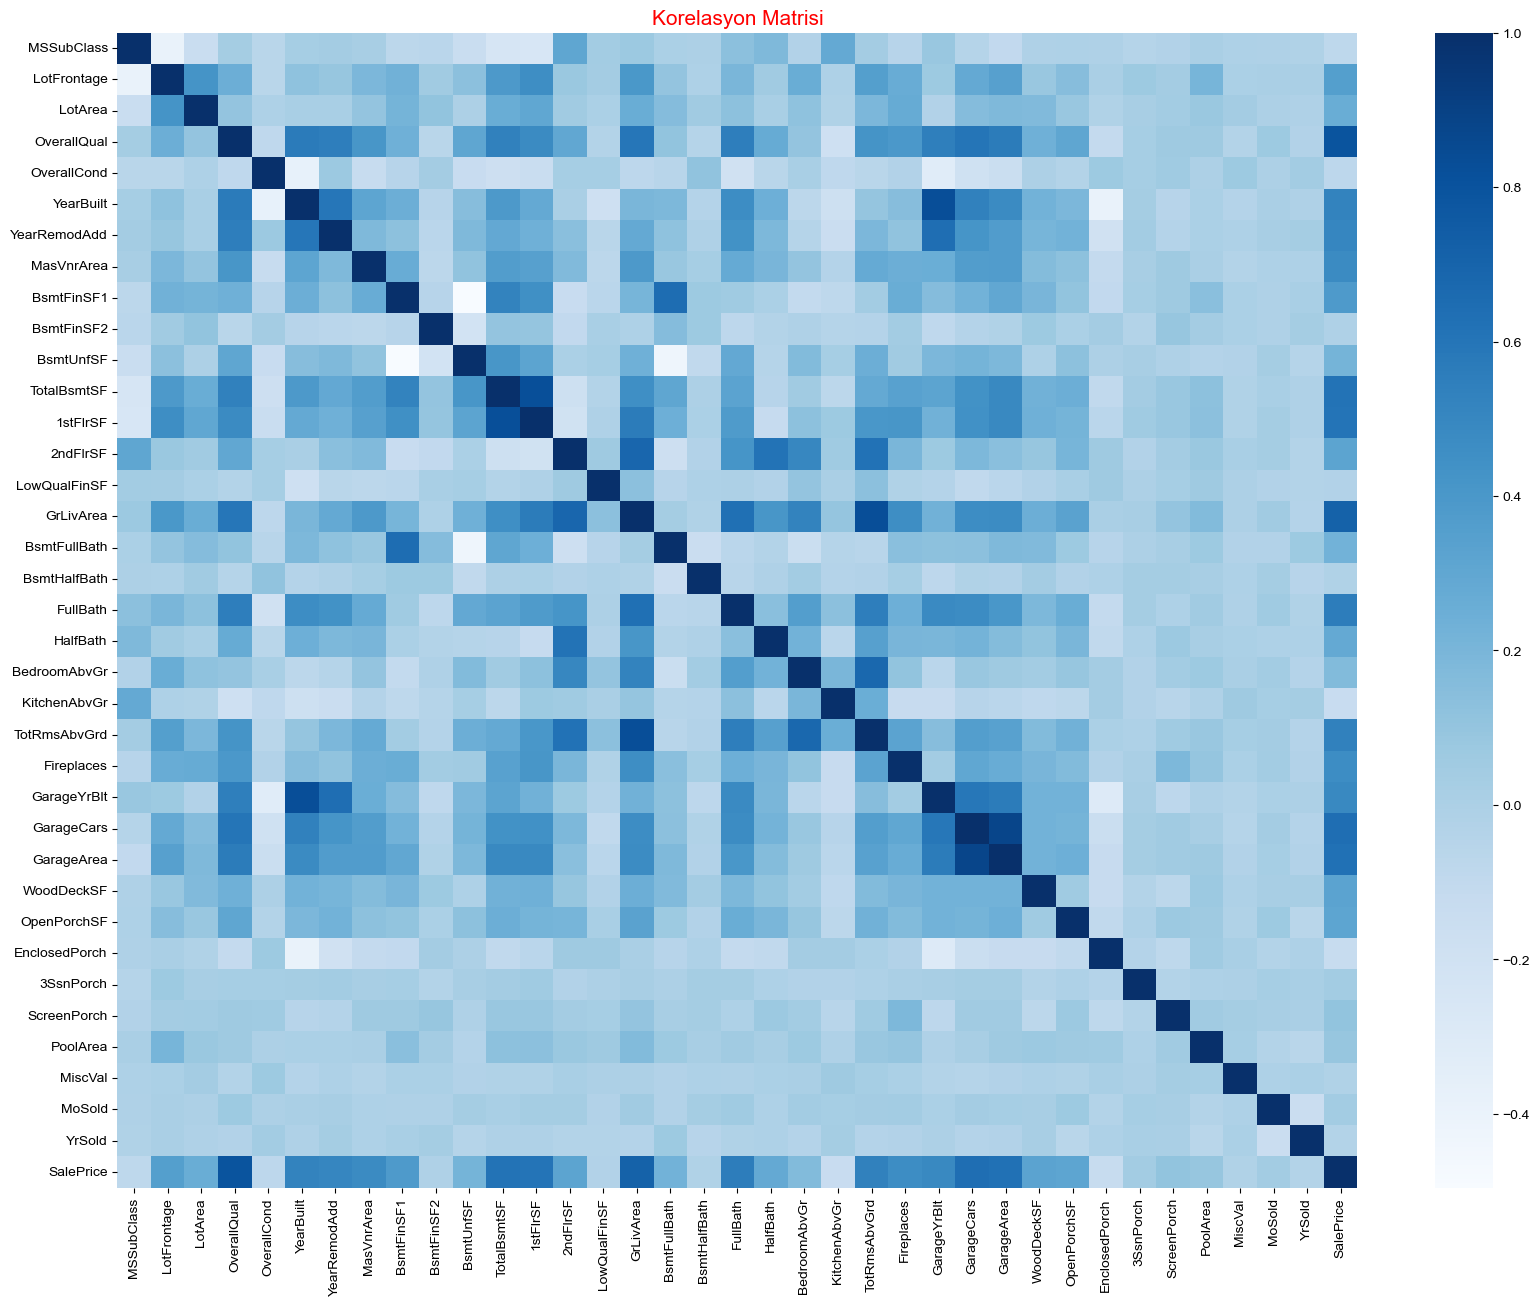

In [18]:
corr_train_df=train_df.corr()
plt.figure(figsize=(20,15))
plt.title("Korelasyon Matrisi", color="red", fontsize=15)
sns.heatmap(corr_train_df,annot=False,cmap="Blues")
sns.set(font_scale=2,style='white')
plt.show()

Satış fiyatlarının bağımısız değikenler ile korelasyonunu inceleyelim ve bağımlı değişken ile korelasyonu 0.4'un altında kalan tüm öznitelikleri kaldıralım. Sadece orta üstü korelasyona sahip sürekli değişkenleri veri setinde tutalım.

In [19]:
corr_price=corr_train_df[['SalePrice']]
corr_abs=abs(corr_price)
low_cor_vars=(corr_price[corr_abs<0.4].dropna()).index.tolist()
low_cor_vars

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallCond',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [20]:
train_df=train_df.drop(columns=low_cor_vars)
test_df=test_df.drop(columns=low_cor_vars)
train_df.shape

(1460, 52)

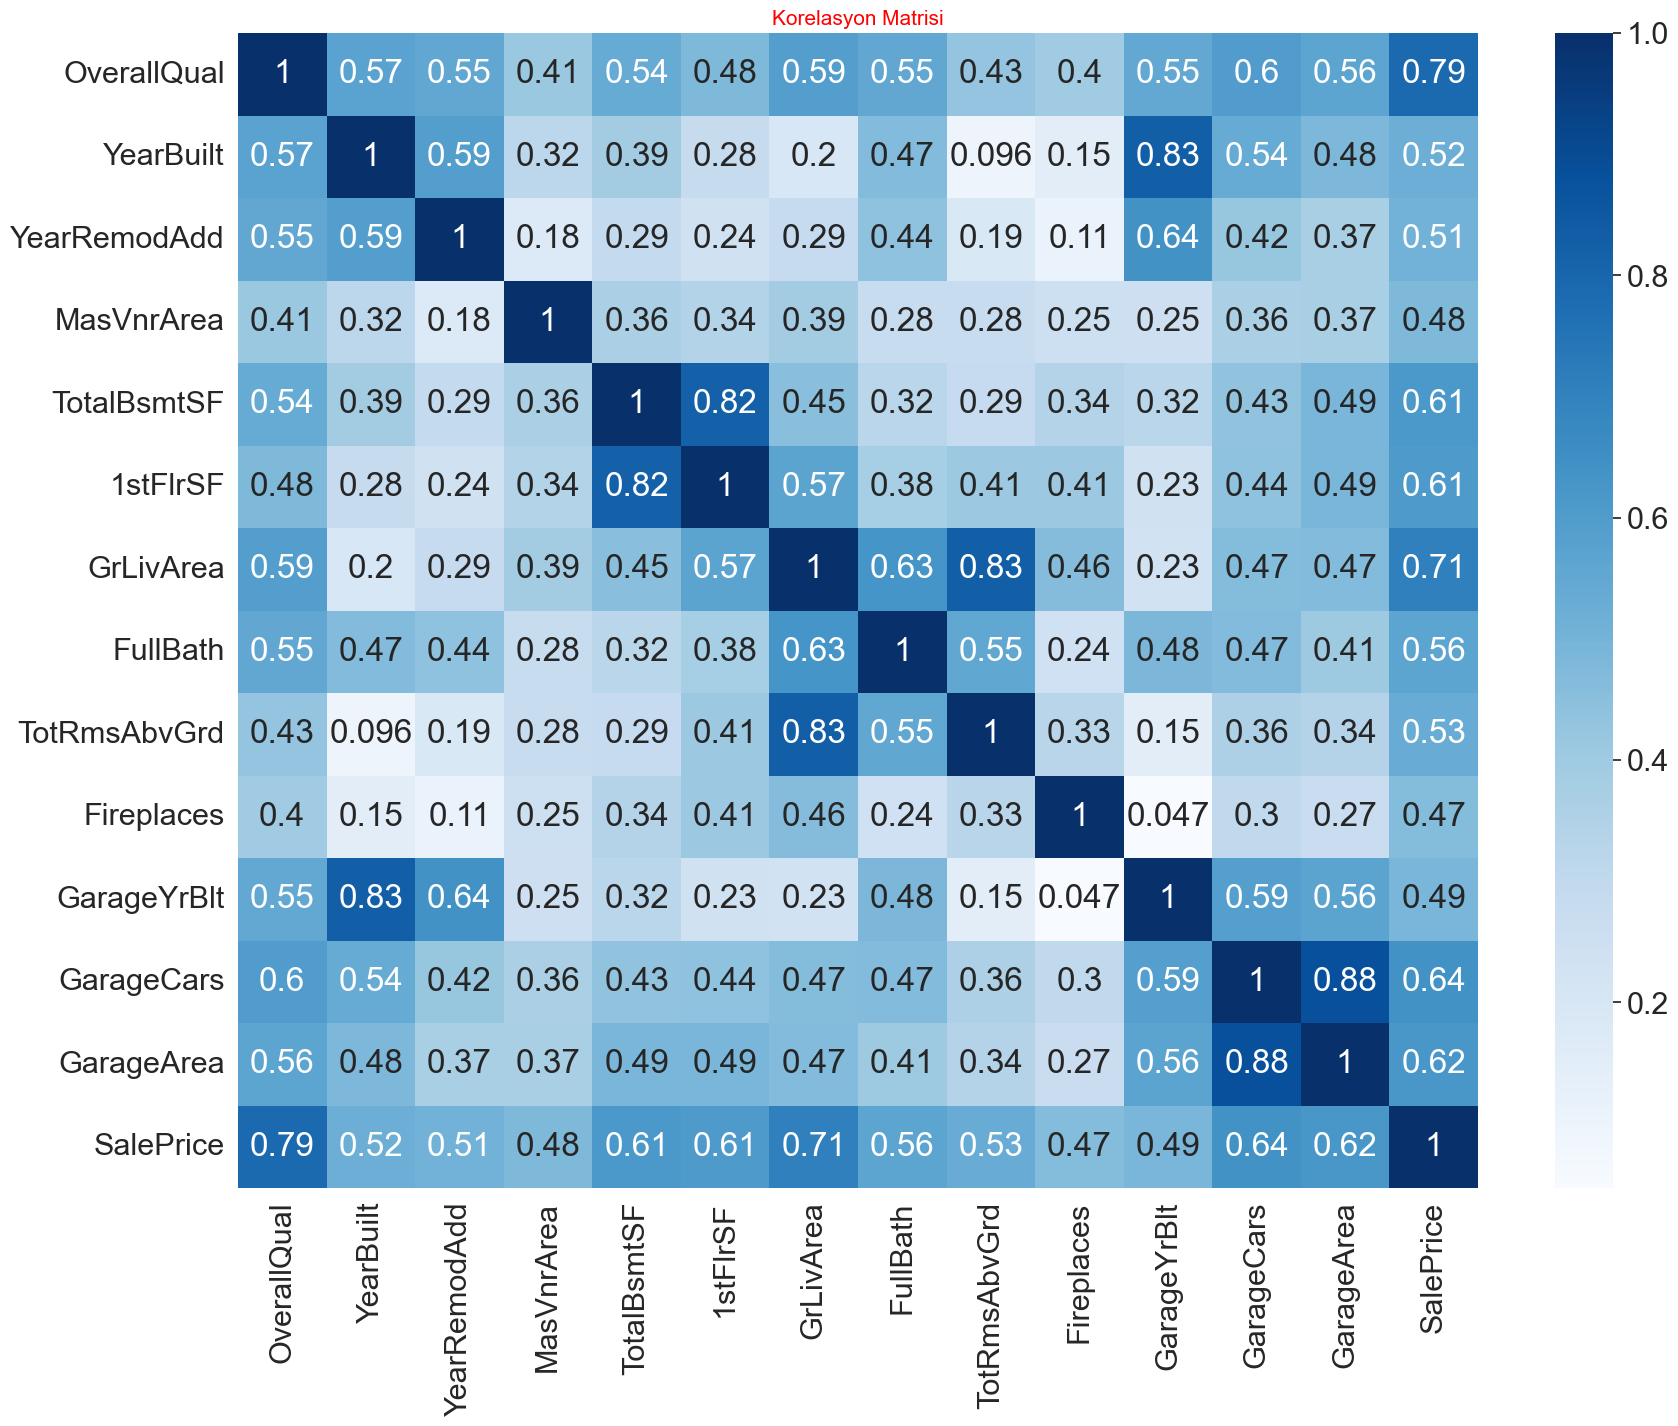

In [21]:
corr_train_df=train_df.corr()
plt.figure(figsize=(20,15))
plt.title("Korelasyon Matrisi", color="red", fontsize=15)
sns.heatmap(corr_train_df,annot=True,cmap="Blues")
sns.set(font_scale=2,style='white')
plt.show()

Korelasyonların anlamlılığını test edip bağımsız değişkenler arasında birbirleri ile yüksek korelasyona sahip değişkenlerden eğleme yapalım:

In [22]:
# Aralarındaki ilişkiler istatiksel olarak anlamlı mı?

anlam=pg.pairwise_corr(train_df)
pd.set_option("display.max_rows",None)

print(anlam[anlam["p-unc"]>0.05]) # anlamsız olan var mı?

             X            Y   method alternative     n    r         CI95%  \
81  Fireplaces  GarageYrBlt  pearson   two-sided  1379 0.05  [-0.01, 0.1]   

    p-unc   BF10  power  
81   0.08  0.153   0.41  


Fireplaces  GarageYrBlt öznitelikleri arasındaki 0.05 korelasyon istatiksel olarak anlamsız.

%80 üzeri anlamlı korelasyonları inceleyelim:

In [23]:
print(anlam[(anlam["p-unc"]<0.05)&(anlam["r"]>0.8)])

              X             Y   method alternative     n    r         CI95%  \
21    YearBuilt   GarageYrBlt  pearson   two-sided  1379 0.83  [0.81, 0.84]   
46  TotalBsmtSF      1stFlrSF  pearson   two-sided  1460 0.82   [0.8, 0.84]   
64    GrLivArea  TotRmsAbvGrd  pearson   two-sided  1460 0.83  [0.81, 0.84]   
88   GarageCars    GarageArea  pearson   two-sided  1460 0.88  [0.87, 0.89]   

    p-unc BF10  power  
21   0.00  inf   1.00  
46   0.00  inf   1.00  
64   0.00  inf   1.00  
88   0.00  inf   1.00  


Birbiriyle yüksek korelasyoan sahip değikenlerden eğleme yapalım. Ayrıca Fireplaces GarageYrBlt öznitelikleri arasındaki korelasyon anlamsızdı, GarageYrBlt özniteliğide veri setinden atılacak.

In [24]:
train_df.drop(columns=['GarageYrBlt', '1stFlrSF', 'TotRmsAbvGrd', 'GarageCars'], inplace=True)
test_df.drop(columns=['GarageYrBlt', '1stFlrSF', 'TotRmsAbvGrd', 'GarageCars'], inplace=True)
train_df.shape

(1460, 48)

In [25]:
test_df.shape

(1459, 47)

### 2.2) Kategorik Değişkenlerin Keşifci Veri Analizi


In [26]:
train_cat_vars = train_df.select_dtypes(exclude='number')
train_cat_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1452 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

In [27]:
train_cat_vars = train_cat_vars.join(train_df['SalePrice'])

In [28]:
for i in train_cat_vars.columns[0:38]:
    print("Kategorik Değişken: {} Unique Değer sayısı: {}".format(i,len(train_cat_vars[i].unique())))

Kategorik Değişken: MSZoning Unique Değer sayısı: 5
Kategorik Değişken: Street Unique Değer sayısı: 2
Kategorik Değişken: LotShape Unique Değer sayısı: 4
Kategorik Değişken: LandContour Unique Değer sayısı: 4
Kategorik Değişken: Utilities Unique Değer sayısı: 2
Kategorik Değişken: LotConfig Unique Değer sayısı: 5
Kategorik Değişken: LandSlope Unique Değer sayısı: 3
Kategorik Değişken: Neighborhood Unique Değer sayısı: 25
Kategorik Değişken: Condition1 Unique Değer sayısı: 9
Kategorik Değişken: Condition2 Unique Değer sayısı: 8
Kategorik Değişken: BldgType Unique Değer sayısı: 5
Kategorik Değişken: HouseStyle Unique Değer sayısı: 8
Kategorik Değişken: RoofStyle Unique Değer sayısı: 6
Kategorik Değişken: RoofMatl Unique Değer sayısı: 8
Kategorik Değişken: Exterior1st Unique Değer sayısı: 15
Kategorik Değişken: Exterior2nd Unique Değer sayısı: 16
Kategorik Değişken: MasVnrType Unique Değer sayısı: 5
Kategorik Değişken: ExterQual Unique Değer sayısı: 4
Kategorik Değişken: ExterCond Unique 

In [29]:
for i in train_cat_vars.columns[0:38]:
    if len(train_cat_vars[i].unique())<3:
        print("Kategorik Değişken: {} Unique Değer sayısı: {}".format(i,len(train_cat_vars[i].unique())))

Kategorik Değişken: Street Unique Değer sayısı: 2
Kategorik Değişken: Utilities Unique Değer sayısı: 2
Kategorik Değişken: CentralAir Unique Değer sayısı: 2


*İki kategoryie sahip değişkenleri inceleyelim:*

In [30]:
iki_deg_col_index=[col for col in train_cat_vars.columns if train_cat_vars[col].nunique()==2]
iki_deg_col=train_cat_vars[iki_deg_col_index]
iki_deg_col

,Street,Utilities,CentralAir
0,Pave,AllPub,Y
1,Pave,AllPub,Y
2,Pave,AllPub,Y
3,Pave,AllPub,Y
4,Pave,AllPub,Y
5,Pave,AllPub,Y
6,Pave,AllPub,Y
7,Pave,AllPub,Y
8,Pave,AllPub,Y
9,Pave,AllPub,Y


In [31]:
for i in iki_deg_col.columns:
    print(f"\n{i}:\n{iki_deg_col[i].value_counts().to_string()}")


Street:
Pave    1454
Grvl       6

Utilities:
AllPub    1459
NoSeWa       1

CentralAir:
Y    1365
N      95


Street ve Utilities çok az meydana gelen kategorik değiken grubu içermektedir. Bu değişkenleri veri setinden atalım:

In [32]:
train_df.drop(columns = ['Utilities', 'Street'], inplace=True)
test_df.drop(columns = ['Utilities', 'Street'], inplace = True)
train_df.shape

(1460, 46)

In [33]:
test_df.shape

(1459, 45)

CetralAir değişkenine Bağımsız iki örneklem t-testin uygulayabilmek için normallik varsayımını kontrol edelim:

In [34]:
central_air=iki_deg_col.drop(columns=["Utilities","Street"],axis=1)
central_air["SalePrice"]=train_cat_vars["SalePrice"]
central_air

,CentralAir,SalePrice
0,Y,208500
1,Y,181500
2,Y,223500
3,Y,140000
4,Y,250000
5,Y,143000
6,Y,307000
7,Y,200000
8,Y,129900
9,Y,118000


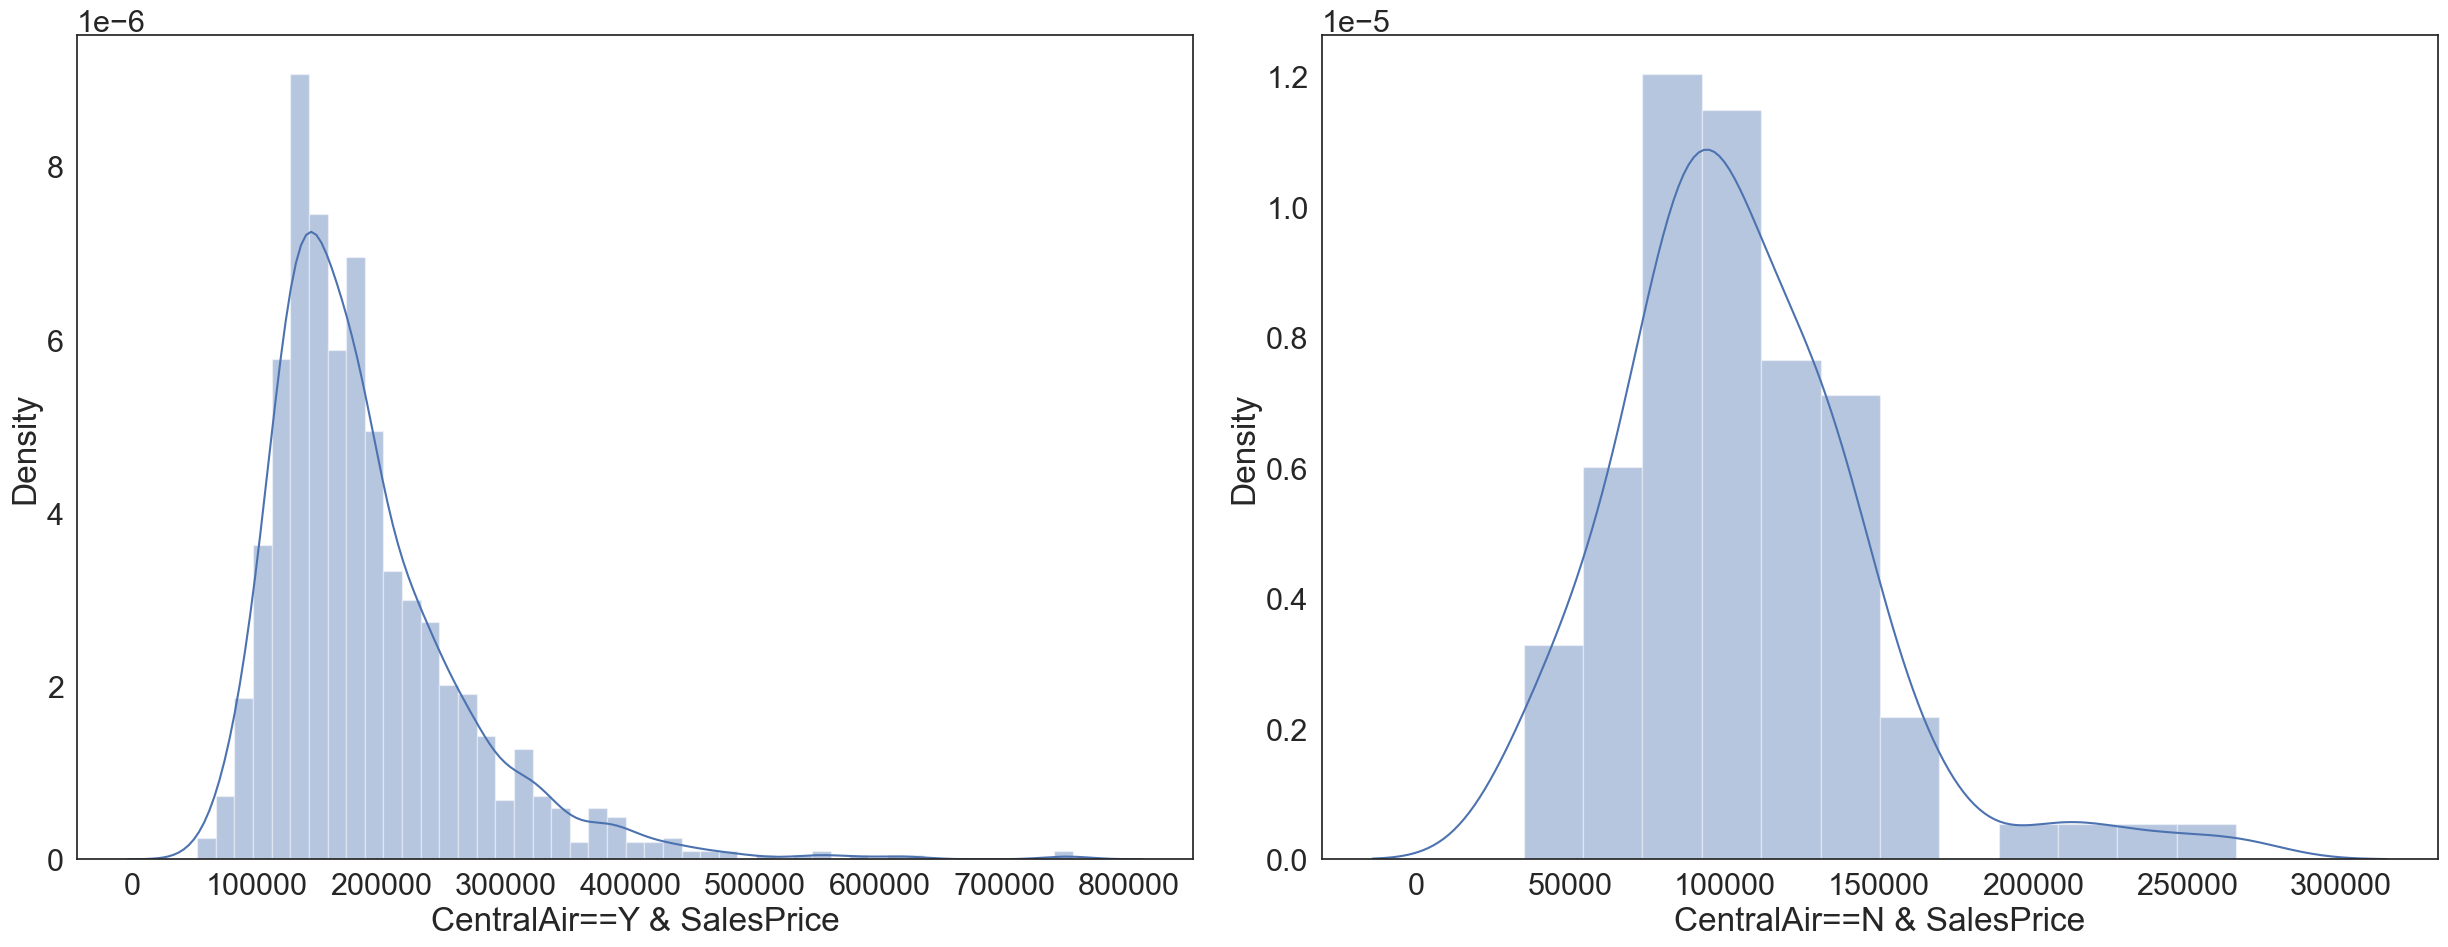

In [35]:
# CentralAir Kategorik Değişken Kırılımında SalesPrice Dağılım Grafiği
fig,ax=plt.subplots(1,2,figsize=(25,10))
for i,ax in enumerate(fig.axes):
    if i<1:
        sns.distplot(central_air[central_air["CentralAir"]=="Y"]["SalePrice"],ax=ax,axlabel="CentralAir==Y & SalesPrice")
    else:
        sns.distplot(central_air[central_air["CentralAir"]=="N"]["SalePrice"],ax=ax,axlabel="CentralAir==N & SalesPrice")
fig.tight_layout()

In [36]:
central_air_y=central_air[central_air["CentralAir"]=="Y"]
central_air_n=central_air[central_air["CentralAir"]=="N"]

# Normallik testi:

norm_central_air_y=stats.shapiro(central_air_y["SalePrice"])
norm_central_air_n=stats.shapiro(central_air_n["SalePrice"])

print(norm_central_air_y,norm_central_air_n)

ShapiroResult(statistic=0.8567322492599487, pvalue=1.703013052788136e-33) ShapiroResult(statistic=0.9259950518608093, pvalue=4.627721136785112e-05)


* H0: Veriler normal dağılmakta
* H1: Veriler normal dağılıma uymaz.

p value değerleri 0.05'den küçük olduğu için h0 hipotezi her iki değişken içinde red edilir. Verilerin dağılımı normal değildir. Bu yüzden bağımsız iki örneklem t testinin non-paramterik testi mann whitney u testini uygulayacağız.

### 2.2.1) Mann Whitney U Testi (Bağımsız İki Örneklem t Testinin Non-Parametrik Karşılığı)
mann whitney u ile iki örneklemin aynı populasyondan gelip gelmediğini test edeceğiz:

* H0: iki örneklem aynı populasyondan gelmektedir.
* H1: iki örneklem faklı populasyondan gelmektedir.

In [37]:
test=pg.mwu(central_air_y["SalePrice"],central_air_n["SalePrice"],alternative="two-sided") # iddamız bir farklılık var mı çift kuyruk... greater - less
print(test)

         U-val alternative  p-val   RBC  CLES
MWU 112,385.00   two-sided   0.00 -0.73  0.87


<b> Yukarıdaki testten sıfır hipotezini reddediyoruz ve iki popülasyon arasında önemli bir fark olduğunu düşünebiliriz, bu nedenle CentralAir Değişkeni modelde kalır.<b/>

In [38]:
train_cat_vars.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,181500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,250000


In [39]:
two_than_more_col=train_cat_vars.drop(columns=["Utilities","Street","CentralAir"],axis=1) # 2 grupluluarı atalım
two_than_more_col.head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,208500
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,181500
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,223500
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,140000
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,250000


In [40]:
def normallik_testi_anova(data,col):
    normallik=[]
    degisken=[]
    for i in data[col].unique().tolist():
        g=data[data[col]==i]
        n=stats.shapiro(g["SalePrice"])
        degisken.append(i)
        normallik.append(n[1])
    sonuc=pd.DataFrame({"Gruplar":degisken,"p value":normallik})
    return sonuc

In [41]:
for i in two_than_more_col.columns[:len(two_than_more_col.columns)]:
    try:
        print(normallik_testi_anova(two_than_more_col,str(i)))
    except ValueError:
        print("Bir hata oluştu")
        continue

   Gruplar  p value
0       RL     0.00
1       RM     0.00
2  C (all)     0.54
3       FV     0.00
4       RH     0.72
  Gruplar  p value
0     Reg     0.00
1     IR1     0.00
2     IR2     0.00
3     IR3     0.88
  Gruplar  p value
0     Lvl     0.00
1     Bnk     0.09
2     Low     0.72
3     HLS     0.01
   Gruplar  p value
0   Inside     0.00
1      FR2     0.00
2   Corner     0.00
3  CulDSac     0.00
4      FR3     0.72
  Gruplar  p value
0     Gtl     0.00
1     Mod     0.01
2     Sev     1.00
Bir hata oluştu
Bir hata oluştu
Bir hata oluştu
  Gruplar  p value
0    1Fam     0.00
1  2fmCon     0.43
2  Duplex     0.04
3  TwnhsE     0.00
4   Twnhs     0.05
  Gruplar  p value
0  2Story     0.00
1  1Story     0.00
2  1.5Fin     0.00
3  1.5Unf     0.89
4  SFoyer     0.05
5    SLvl     0.00
6  2.5Unf     0.00
7  2.5Fin     0.05
Bir hata oluştu
Bir hata oluştu
Bir hata oluştu
Bir hata oluştu
Bir hata oluştu
  Gruplar  p value
0      Gd     0.00
1      TA     0.00
2      Ex     0.06
3    

Kategorik değikenlere ait her grubu incelediğimizde bağımlı değiken kırılımında normal dağılıma uymayanlar mevcut (p>0.05).

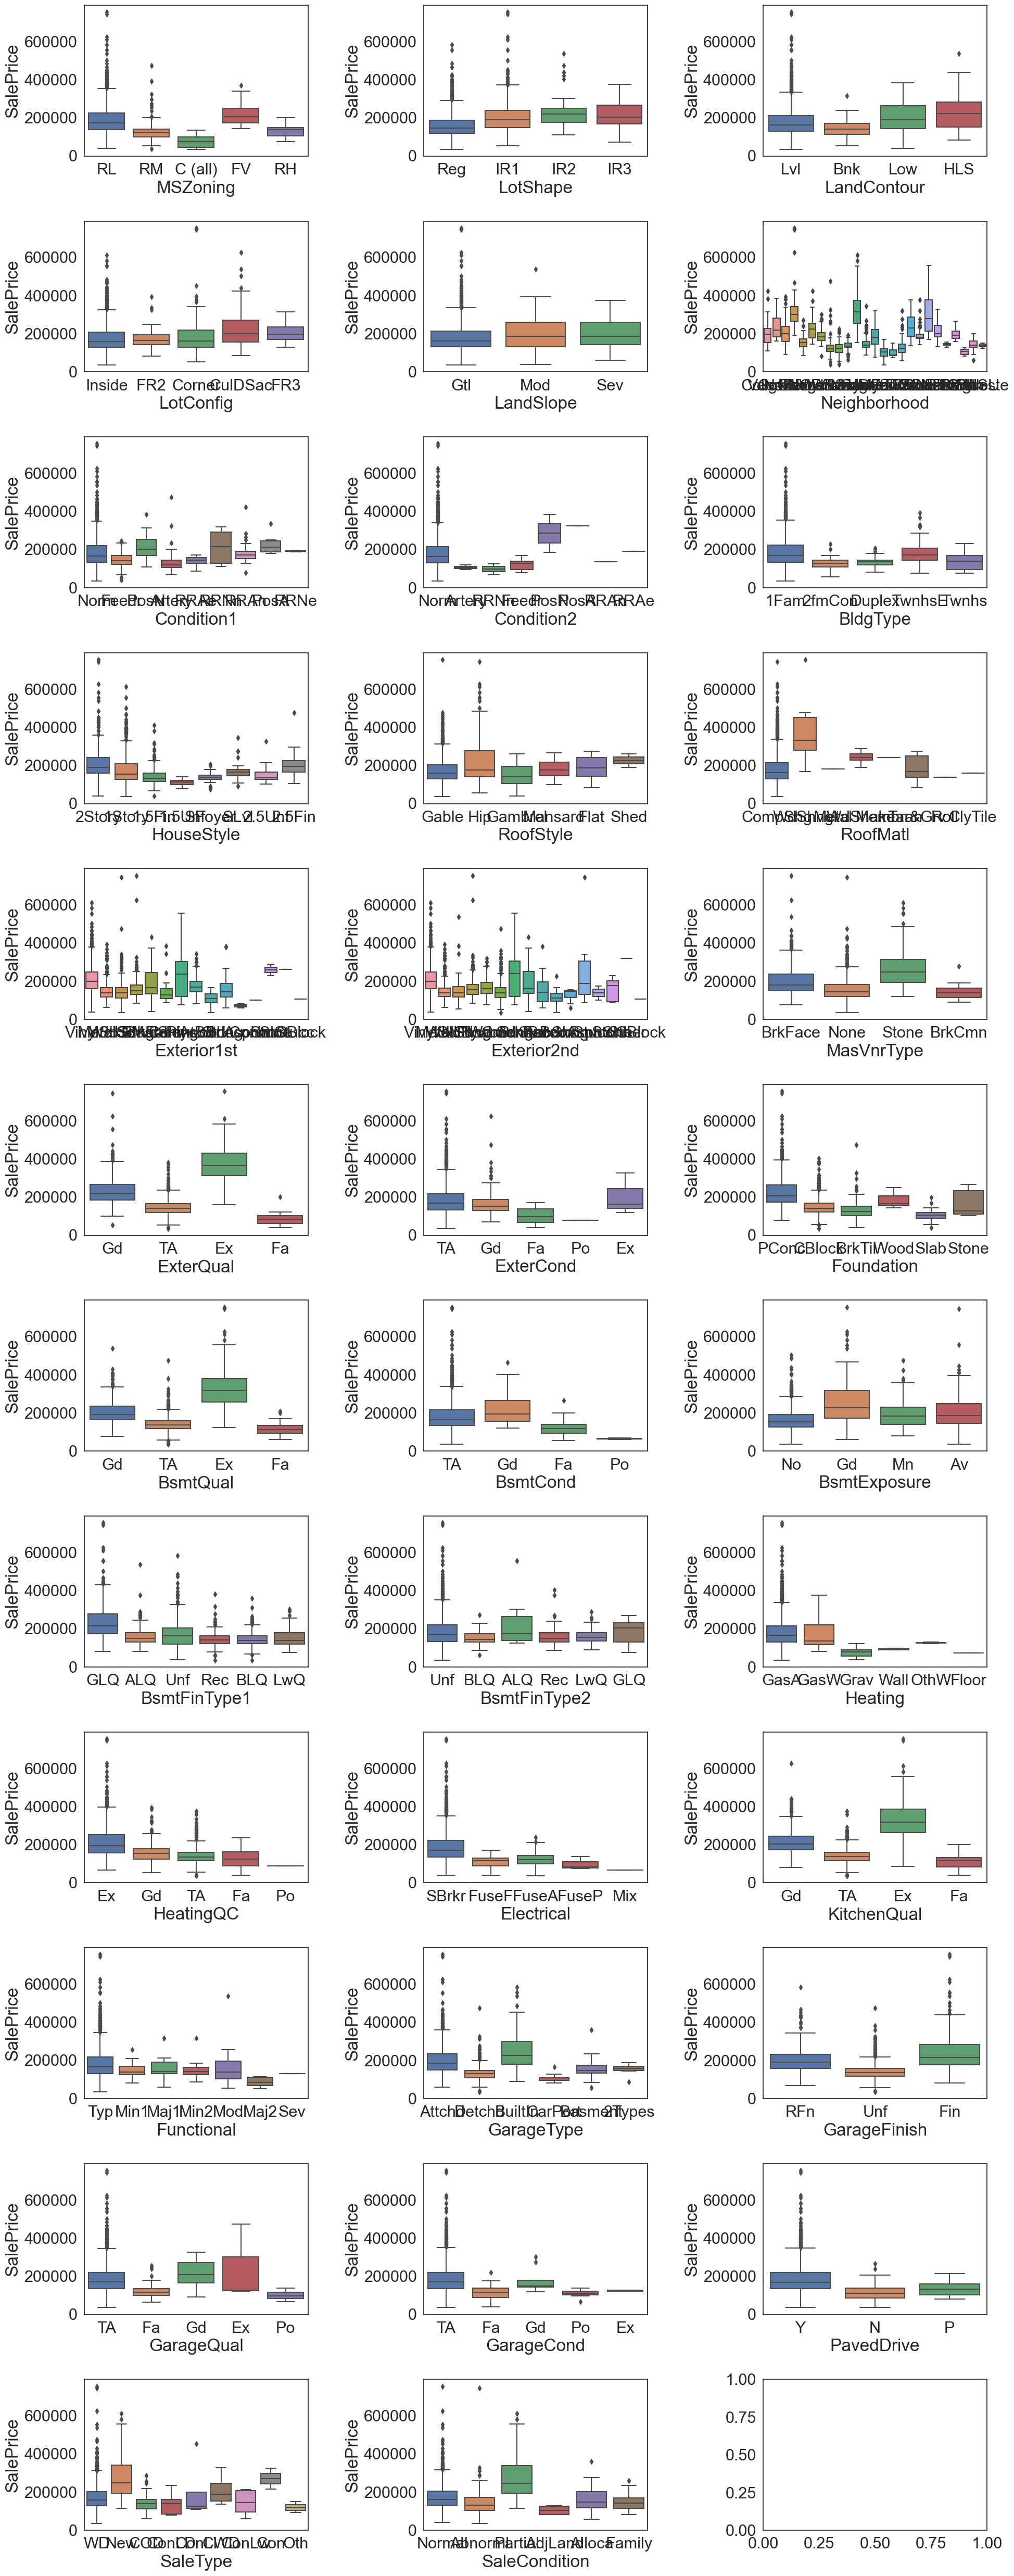

In [42]:
fig,axes=plt.subplots(round(len(two_than_more_col.columns) / 3), 3, figsize=(20,50))

for i,ax in enumerate(fig.axes):
    if i<(len(two_than_more_col.columns)-1):
        sns.boxplot(data=two_than_more_col, x=two_than_more_col.columns[i], y='SalePrice', ax=ax)
fig.tight_layout()

### 2.2.2) Kruskal Testi (Tek Yönlü ANOVA Testinin Non-Parametrik Karşılığı)

Tek yönlü anova testinin nonparametrik karşılığı kruskal testini uygulayalım ve gruplar arasındaki farklılıklar istatiksel olarak anlamlı mı test edelim:

In [43]:
values=[]
test=[]
p=[]

for i in two_than_more_col.columns[:len(two_than_more_col.columns)-1]:
    t=pg.kruskal(two_than_more_col,dv="SalePrice",between=str(i))
    values.append(i)
    test.append(t["H"][0])
    p.append(t["p-unc"][0])

sonuc=pd.DataFrame({"Values":values,"Test İstatistiği":test,"P value":p})
sonuc=sonuc.sort_values(by="P value",ignore_index=True)
sonuc

,Values,Test İstatistiği,P value
0,Neighborhood,868.53,0.00
1,ExterQual,683.44,0.00
2,KitchenQual,661.48,0.00
3,BsmtQual,631.83,0.00
4,GarageFinish,505.21,0.00
5,Foundation,488.72,0.00
6,GarageType,421.15,0.00
7,HeatingQC,356.78,0.00
8,BsmtFinType1,298.22,0.00
9,MasVnrType,275.67,0.00


In [44]:
sonuc[sonuc["P value"]<0.05] # kategorik değişkenlerin grupları medyanlarının en az birinin farklı olması

,Values,Test İstatistiği,P value
0,Neighborhood,868.53,0.00
1,ExterQual,683.44,0.00
2,KitchenQual,661.48,0.00
3,BsmtQual,631.83,0.00
4,GarageFinish,505.21,0.00
5,Foundation,488.72,0.00
6,GarageType,421.15,0.00
7,HeatingQC,356.78,0.00
8,BsmtFinType1,298.22,0.00
9,MasVnrType,275.67,0.00


In [45]:
sonuc[sonuc["P value"]>0.05] # kategorik değişkenlerin grupları medyanları arasında istatiksel olarak anlamlı fark olmaması

,Values,Test İstatistiği,P value
33,BsmtFinType2,11.06,0.05
34,LandSlope,3.94,0.14


Test istatistiği 100'ün altında kalanları veri setinden çıkartalım. Diğerlerini modele dahil edeceğiz.

In [46]:
drop_columns=sonuc[sonuc["Test İstatistiği"]<100]["Values"].tolist()
train_df.drop(columns = drop_columns, inplace=True)
test_df.drop(columns = drop_columns, inplace = True)
train_df.shape

(1460, 31)

In [47]:
test_df.shape

(1459, 30)

### 2.2.3) Boş Gözlemlerin Doldurulması:

Test data setinde en az 1 boş gözlem içeren satırların indekslerini kaydedelim:

In [53]:
bos_index=[]
for i in range(len(test_df)):
    t_f=[]
    for j in test_df.isnull().loc[i,:]:
        t_f.append(j)
    if True in t_f:
        bos_index.append(i)
bos_index

[27,
 53,
 71,
 79,
 92,
 95,
 96,
 98,
 100,
 125,
 130,
 133,
 134,
 154,
 155,
 231,
 246,
 257,
 261,
 269,
 318,
 327,
 348,
 350,
 351,
 354,
 359,
 362,
 371,
 374,
 376,
 379,
 387,
 388,
 396,
 397,
 398,
 400,
 422,
 433,
 455,
 532,
 544,
 550,
 581,
 590,
 606,
 608,
 621,
 630,
 633,
 636,
 639,
 644,
 660,
 662,
 666,
 675,
 691,
 693,
 728,
 729,
 730,
 731,
 732,
 733,
 752,
 756,
 757,
 758,
 764,
 778,
 786,
 790,
 851,
 865,
 880,
 888,
 889,
 893,
 894,
 908,
 927,
 938,
 939,
 962,
 966,
 975,
 992,
 993,
 1029,
 1030,
 1038,
 1087,
 1092,
 1093,
 1097,
 1104,
 1115,
 1116,
 1118,
 1119,
 1132,
 1139,
 1143,
 1149,
 1150,
 1197,
 1226,
 1231,
 1233,
 1242,
 1248,
 1303,
 1306,
 1307,
 1311,
 1329,
 1331,
 1339,
 1343,
 1344,
 1364,
 1399,
 1402,
 1410,
 1428,
 1431,
 1432,
 1433,
 1444,
 1449,
 1453,
 1454,
 1457]

In [54]:
test_df=test_df.dropna().reset_index().drop(columns="index")
test_df.shape

(1324, 30)

In [55]:
train_df.isnull().sum()[train_df.isnull().sum()>0].index.tolist()

['MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'Electrical',
 'GarageType',
 'GarageFinish']

Kategorik değişkenlerde yer alan boş gözlemleri modları ile dolduralım.

In [56]:
na_in_col=train_df.isnull().sum()[train_df.isnull().sum()>0].index.tolist()
def na_fill(data):
    for i in na_in_col:
        data[str(i)].fillna(data[str(i)].mode()[0],inplace=True)
    return data

In [57]:
train_df=na_fill(train_df)
train_df.isnull().sum()

MSZoning         0
LotShape         0
Neighborhood     0
HouseStyle       0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
TotalBsmtSF      0
HeatingQC        0
CentralAir       0
Electrical       0
GrLivArea        0
FullBath         0
KitchenQual      0
Fireplaces       0
GarageType       0
GarageFinish     0
GarageArea       0
PavedDrive       0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

## 3) Aykırı Değer Analizi

In [58]:
kategorik_columns=train_df.select_dtypes(include=["object"]).columns.tolist()
kategorik_columns

['MSZoning',
 'LotShape',
 'Neighborhood',
 'HouseStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [59]:
train_df_numeric=train_df.drop(columns=kategorik_columns,axis=1)
train_df_numeric.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,GrLivArea,FullBath,Fireplaces,GarageArea,SalePrice
0,7,2003,2003,196.00,856,1710,2,0,548,208500
1,6,1976,1976,0.00,1262,1262,2,1,460,181500
2,7,2001,2002,162.00,920,1786,2,1,608,223500
3,7,1915,1970,0.00,756,1717,1,1,642,140000
4,8,2000,2000,350.00,1145,2198,2,1,836,250000


In [60]:
clf=LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(train_df_numeric)
df_scores=clf.negative_outlier_factor_
# En kotu 100 gözlemin skoru:
np.sort(df_scores)[0:100]

array([-5.31053327, -4.2673689 , -4.13995693, -2.85901443, -2.84844678,
       -2.72089681, -2.50982637, -2.27854277, -2.26081516, -2.07870317,
       -1.84948863, -1.84887447, -1.79106137, -1.71985313, -1.69628172,
       -1.69492958, -1.67474142, -1.63270016, -1.61277575, -1.60062541,
       -1.59683879, -1.59618584, -1.56616578, -1.51696774, -1.49575219,
       -1.49334526, -1.49296835, -1.48945728, -1.48820224, -1.46720797,
       -1.46335712, -1.45607268, -1.45079444, -1.43984065, -1.43679471,
       -1.42184692, -1.42183051, -1.41559502, -1.40628211, -1.39061876,
       -1.38990238, -1.38297116, -1.38052156, -1.34051296, -1.34024203,
       -1.33887373, -1.33717398, -1.32267767, -1.31893142, -1.31642624,
       -1.30717928, -1.30216828, -1.2983476 , -1.29688107, -1.29631625,
       -1.29456094, -1.29068293, -1.28853095, -1.28656811, -1.28616969,
       -1.28614805, -1.27916209, -1.27672752, -1.27359528, -1.27259562,
       -1.27219627, -1.27186698, -1.26349768, -1.25931337, -1.25

<Figure size 3000x4000 with 0 Axes>

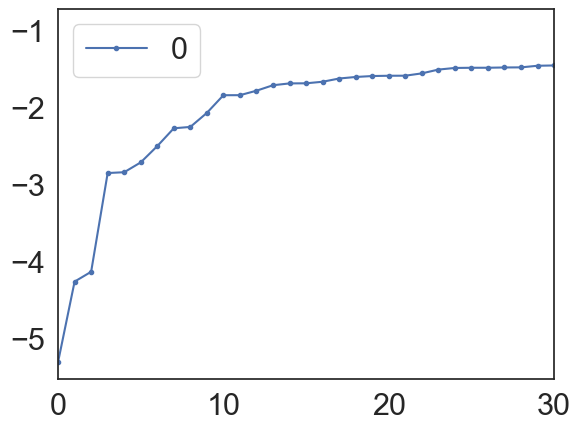

In [61]:
# grafik ile incelenmesi:
plt.figure(figsize=(30,40))
scores=pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True,xlim=[0,30],style=".-")
plt.show()

10'uncu gözlem değerini eşik değer olarak belirleyeceğiz. O değerden sonra değişim azalıyor.

In [62]:
esik_deger=np.sort(df_scores)[10]
esik_deger

-1.8494886296697863

In [63]:
train_df[df_scores<esik_deger] # Aykırı değerler

,MSZoning,LotShape,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,TotalBsmtSF,HeatingQC,CentralAir,Electrical,GrLivArea,FullBath,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageArea,PavedDrive,SaleType,SaleCondition,SalePrice
440,RL,Reg,NridgHt,1Story,10,2008,2008,VinylSd,VinylSd,Stone,200.00,Ex,PConc,Ex,Gd,GLQ,3094,Ex,Y,SBrkr,2402,2,Ex,2,Attchd,Fin,672,Y,WD,Normal,555000
523,RL,IR1,Edwards,2Story,10,2007,2008,CemntBd,CmentBd,Stone,762.00,Ex,PConc,Ex,Gd,GLQ,3138,Ex,Y,SBrkr,4676,3,Ex,1,BuiltIn,Fin,884,Y,New,Partial,184750
691,RL,IR1,NoRidge,2Story,10,1994,1995,HdBoard,HdBoard,BrkFace,"1,170.00",Ex,PConc,Ex,Gd,GLQ,2444,Ex,Y,SBrkr,4316,3,Ex,2,Attchd,Fin,832,Y,WD,Normal,755000
769,RL,IR2,StoneBr,2Story,8,2003,2003,CemntBd,Wd Shng,BrkFace,603.00,Ex,PConc,Gd,Gd,ALQ,1650,Ex,Y,SBrkr,3279,3,Ex,1,BuiltIn,Fin,841,Y,WD,Normal,538000
803,RL,Reg,NridgHt,2Story,9,2008,2009,VinylSd,VinylSd,Stone,424.00,Ex,PConc,Ex,Gd,Unf,1734,Ex,Y,SBrkr,2822,3,Ex,1,BuiltIn,RFn,1020,Y,New,Partial,582933
898,RL,IR1,NridgHt,1Story,9,2009,2010,VinylSd,VinylSd,Stone,760.00,Ex,PConc,Ex,Gd,GLQ,2330,Ex,Y,SBrkr,2364,2,Ex,2,Attchd,Fin,820,Y,New,Partial,611657
1046,RL,IR1,StoneBr,2Story,9,2005,2006,CemntBd,CmentBd,Stone,208.00,Gd,PConc,Ex,Av,GLQ,1992,Ex,Y,SBrkr,2868,3,Ex,1,BuiltIn,Fin,716,Y,New,Partial,556581
1169,RL,IR1,NoRidge,2Story,10,1995,1996,HdBoard,HdBoard,BrkFace,"1,378.00",Gd,PConc,Ex,Gd,GLQ,1930,Ex,Y,SBrkr,3627,3,Gd,1,Attchd,Fin,807,Y,WD,Normal,625000
1182,RL,IR1,NoRidge,2Story,10,1996,1996,Wd Sdng,ImStucc,None,0.00,Gd,PConc,Ex,Av,GLQ,2396,Ex,Y,SBrkr,4476,3,Ex,2,Attchd,Fin,813,Y,WD,Abnorml,745000
1298,RL,IR3,Edwards,2Story,10,2008,2008,Stucco,Stucco,Stone,796.00,Ex,PConc,Ex,Gd,GLQ,6110,Ex,Y,SBrkr,5642,2,Ex,3,Attchd,Fin,1418,Y,New,Partial,160000


In [64]:
len(train_df[df_scores<esik_deger])/(len(train_df)) # aykırı değerler veri setinin %0.06'sını olusturuyor.

0.00684931506849315

In [65]:
train_df=train_df[df_scores>esik_deger].reset_index().drop(columns="index") # Aykırı değerleri veri setinden attık
train_df.head()

,MSZoning,LotShape,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,TotalBsmtSF,HeatingQC,CentralAir,Electrical,GrLivArea,FullBath,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageArea,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Reg,CollgCr,2Story,7,2003,2003,VinylSd,VinylSd,BrkFace,196.00,Gd,PConc,Gd,No,GLQ,856,Ex,Y,SBrkr,1710,2,Gd,0,Attchd,RFn,548,Y,WD,Normal,208500
1,RL,Reg,Veenker,1Story,6,1976,1976,MetalSd,MetalSd,None,0.00,TA,CBlock,Gd,Gd,ALQ,1262,Ex,Y,SBrkr,1262,2,TA,1,Attchd,RFn,460,Y,WD,Normal,181500
2,RL,IR1,CollgCr,2Story,7,2001,2002,VinylSd,VinylSd,BrkFace,162.00,Gd,PConc,Gd,Mn,GLQ,920,Ex,Y,SBrkr,1786,2,Gd,1,Attchd,RFn,608,Y,WD,Normal,223500
3,RL,IR1,Crawfor,2Story,7,1915,1970,Wd Sdng,Wd Shng,None,0.00,TA,BrkTil,TA,No,ALQ,756,Gd,Y,SBrkr,1717,1,Gd,1,Detchd,Unf,642,Y,WD,Abnorml,140000
4,RL,IR1,NoRidge,2Story,8,2000,2000,VinylSd,VinylSd,BrkFace,350.00,Gd,PConc,Gd,Av,GLQ,1145,Ex,Y,SBrkr,2198,2,Gd,1,Attchd,RFn,836,Y,WD,Normal,250000


In [66]:
train_df.shape

(1449, 31)

In [67]:
test_df.shape

(1324, 30)

In [68]:
train_df.tail()

,MSZoning,LotShape,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,TotalBsmtSF,HeatingQC,CentralAir,Electrical,GrLivArea,FullBath,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageArea,PavedDrive,SaleType,SaleCondition,SalePrice
1444,RL,Reg,Gilbert,2Story,6,1999,2000,VinylSd,VinylSd,None,0.00,TA,PConc,Gd,No,Unf,953,Ex,Y,SBrkr,1647,2,TA,1,Attchd,RFn,460,Y,WD,Normal,175000
1445,RL,Reg,NWAmes,1Story,6,1978,1988,Plywood,Plywood,Stone,119.00,TA,CBlock,Gd,No,ALQ,1542,TA,Y,SBrkr,2073,2,TA,2,Attchd,Unf,500,Y,WD,Normal,210000
1446,RL,Reg,Crawfor,2Story,7,1941,2006,CemntBd,CmentBd,None,0.00,Ex,Stone,TA,No,GLQ,1152,Ex,Y,SBrkr,2340,2,Gd,2,Attchd,RFn,252,Y,WD,Normal,266500
1447,RL,Reg,NAmes,1Story,5,1950,1996,MetalSd,MetalSd,None,0.00,TA,CBlock,TA,Mn,GLQ,1078,Gd,Y,FuseA,1078,1,Gd,0,Attchd,Unf,240,Y,WD,Normal,142125
1448,RL,Reg,Edwards,1Story,5,1965,1965,HdBoard,HdBoard,None,0.00,Gd,CBlock,TA,No,BLQ,1256,Gd,Y,SBrkr,1256,1,TA,0,Attchd,Fin,276,Y,WD,Normal,147500


## 4) Label Encoder ve One Hot Dummies Dönüşümü

In [69]:
le=LabelEncoder()

for i in kategorik_columns:
    train_df[i]=le.fit_transform(train_df[i])
    test_df[i]=le.transform(test_df[i])
train_df.head()

,MSZoning,LotShape,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,TotalBsmtSF,HeatingQC,CentralAir,Electrical,GrLivArea,FullBath,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageArea,PavedDrive,SaleType,SaleCondition,SalePrice
0,3,3,5,5,7,2003,2003,12,13,1,196.00,2,2,2,3,2,856,0,1,4,1710,2,2,0,1,1,548,2,8,4,208500
1,3,3,24,2,6,1976,1976,8,8,2,0.00,3,1,2,1,0,1262,0,1,4,1262,2,3,1,1,1,460,2,8,4,181500
2,3,0,5,5,7,2001,2002,12,13,1,162.00,2,2,2,2,2,920,0,1,4,1786,2,2,1,1,1,608,2,8,4,223500
3,3,0,6,5,7,1915,1970,13,15,2,0.00,3,0,3,3,0,756,2,1,4,1717,1,2,1,5,2,642,2,8,0,140000
4,3,0,15,5,8,2000,2000,12,13,1,350.00,2,2,2,0,2,1145,0,1,4,2198,2,2,1,1,1,836,2,8,4,250000


In [70]:
test_df.head()

,MSZoning,LotShape,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,TotalBsmtSF,HeatingQC,CentralAir,Electrical,GrLivArea,FullBath,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageArea,PavedDrive,SaleType,SaleCondition
0,2,3,12,2,5,1961,1961,12,13,2,0.00,3,1,3,3,4,882.00,4,1,4,896,1,3,0,1,2,730.00,2,8,4
1,3,0,12,2,6,1958,1958,13,14,1,108.00,3,1,3,3,0,"1,329.00",4,1,4,1329,1,2,0,1,2,312.00,2,8,4
2,3,0,8,5,5,1997,1998,12,13,2,0.00,3,2,2,3,2,928.00,2,1,4,1629,2,3,1,1,0,482.00,2,8,4
3,3,0,8,5,6,1998,1998,12,13,1,20.00,3,2,3,3,2,926.00,0,1,4,1604,2,2,1,1,0,470.00,2,8,4
4,3,0,22,2,8,1992,1992,6,6,2,0.00,2,2,2,3,0,"1,280.00",0,1,4,1280,2,2,0,1,1,506.00,2,8,4


In [71]:
train_df.shape

(1449, 31)

In [72]:
test_df.shape

(1324, 30)

In [73]:
onehotdonusum_train=pd.get_dummies(train_df,columns=kategorik_columns,drop_first=True)
onehotdonusum_test=pd.get_dummies(test_df,columns=kategorik_columns,drop_first=True)

In [74]:
print(onehotdonusum_train.shape)
print(onehotdonusum_test.shape)

(1449, 133)
(1324, 121)


In [75]:
for i in onehotdonusum_test.columns.tolist():
    if i not in onehotdonusum_train.columns.tolist():
        print(i)

In [76]:
for i in onehotdonusum_train.columns.tolist():
    if i not in onehotdonusum_test.columns.tolist():
        print(i)

SalePrice
HouseStyle_3
Exterior1st_1
Exterior1st_4
Exterior1st_7
Exterior1st_10
Exterior2nd_1
Exterior2nd_4
Exterior2nd_9
Exterior2nd_11
Foundation_3
Electrical_3


One Hot dönüşümü uygulamadan devam edelim..

In [77]:
#onehotdonusum_train=onehotdonusum_train.drop(columns=[...],axis=1)
# One Hot dönüşümü uygulandığında trainde yer alıp da test verilerinde yer almayan değişkenler oluyor.
# Bunlar yukarıdaki kod ile train data setinden atılıp dönüşüm saglanabilir ve test veri seti ile test edilebilir.
#print(onehotdonusum_train.shape)
#print(onehotdonusum_test.shape)

In [78]:
#train_df=onehotdonusum_train
#test_df=onehotdonusum_test

## 5) ML Modelleri

In [79]:
X_train=train_df.drop("SalePrice",axis=1)
y_train=train_df["SalePrice"]
X_test=test_df

In [80]:
# Standartlaştırma:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [81]:
print(X_train.shape)
print(X_test.shape)

(1449, 30)
(1324, 30)


In [82]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_val.shape)

(1159, 30)
(290, 30)


In [77]:
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_val, y_train, y_val)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:48<00:00,  1.17s/it]


In [78]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
PoissonRegressor,0.88,0.89,"23,338.85",0.03
GradientBoostingRegressor,0.85,0.87,"25,892.48",0.33
HuberRegressor,0.85,0.86,"26,082.48",0.06
BayesianRidge,0.85,0.86,"26,141.10",0.04
PassiveAggressiveRegressor,0.85,0.86,"26,141.83",0.11
RidgeCV,0.85,0.86,"26,156.25",0.02
LassoLarsIC,0.85,0.86,"26,158.83",0.02
LarsCV,0.85,0.86,"26,165.30",0.06
LassoLarsCV,0.85,0.86,"26,165.30",0.08


LazyRegressor sonucunda bu veri setine uygun en başarılı makine öğrenmesi algoritmaları:

PoissonRegressor ve GradientBoostingRegressor 

In [83]:
from sklearn.linear_model import PoissonRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [84]:
possion_regressor_model=PoissonRegressor()
possion_regressor_model.fit(X_train,y_train)
possion_regressor_tahmin=possion_regressor_model.predict(X_val)

In [85]:
boost_regressor_model=GradientBoostingRegressor(random_state=0)
boost_regressor_model.fit(X_train,y_train)
boost_regressor_tahmin=boost_regressor_model.predict(X_val)

In [86]:
rmse_possion=mt.mean_squared_error(y_val,possion_regressor_tahmin,squared=True)
r2_possion=mt.r2_score(y_val,possion_regressor_tahmin)

rmse_boost=mt.mean_squared_error(y_val,boost_regressor_tahmin,squared=True)
r2_boost=mt.r2_score(y_val,boost_regressor_tahmin)

print(rmse_possion,r2_possion)
print(rmse_boost,r2_boost)

544701855.6003344 0.891888639195116
666316044.9048249 0.867750892345694


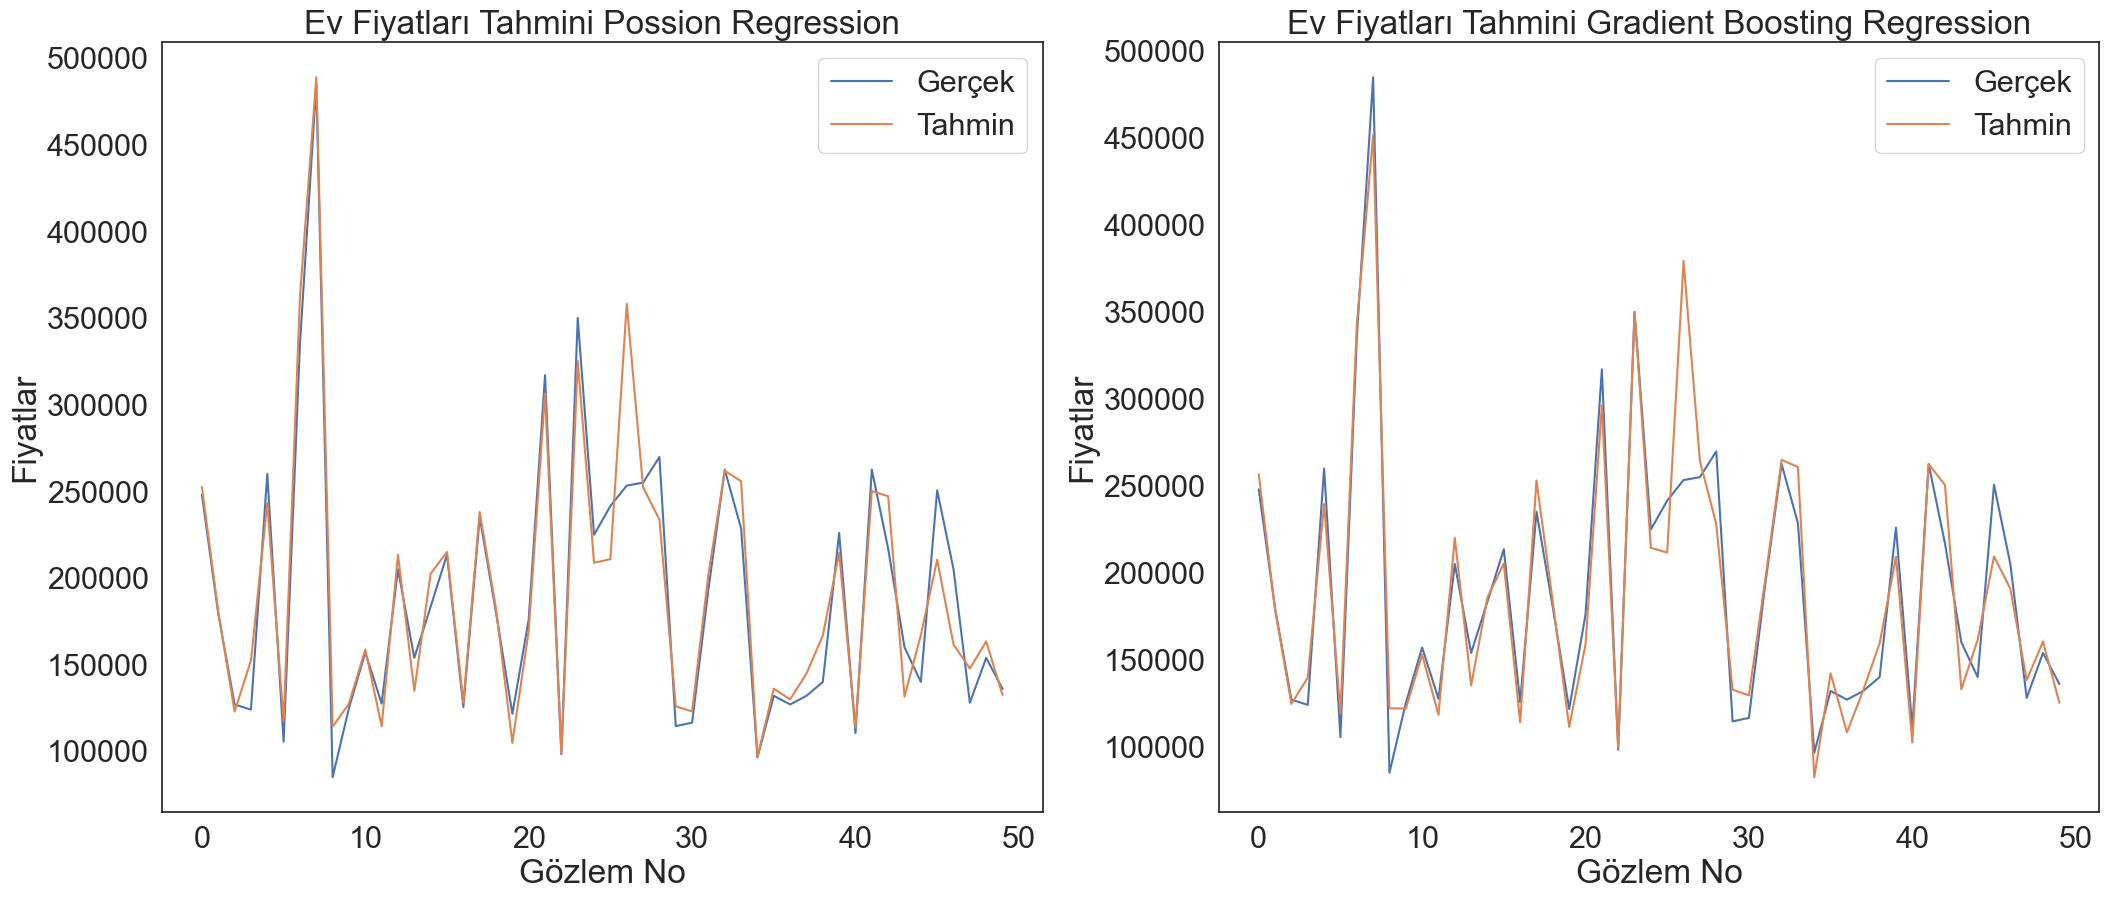

In [87]:
fig,ax=plt.subplots(1,2,figsize=(25,10))
ax[0].plot(range(len(y_val[:50])),y_val[:50],label="Gerçek")
ax[0].plot(range(len(y_val[:50])),possion_regressor_tahmin[:50],label="Tahmin")
ax[0].set_title("Ev Fiyatları Tahmini Possion Regression")
ax[0].set_ylabel("Fiyatlar")
ax[0].set_xlabel("Gözlem No")
ax[0].legend()
ax[1].plot(range(len(y_val[:50])),y_val[:50],label="Gerçek")
ax[1].plot(range(len(y_val[:50])),boost_regressor_tahmin[:50],label="Tahmin")
ax[1].set_title("Ev Fiyatları Tahmini Gradient Boosting Regression")
ax[1].set_ylabel("Fiyatlar")
ax[1].set_xlabel("Gözlem No")
ax[1].legend()
plt.show()

Her iki model ile doğrulama verileri ile satış fiyatları tahmin edilip, gerçek satış fiyatlarıyla karşılaştırılmıştır. Başarıyı daha iyileştirebilmek için hiper parametre optimizasyonu yapalım ve sonuçları tekrar inceleyelim:

## 5.1) Model Tuning

In [88]:
# GradientBoostingRegressor hiper parametre optimizasyonunda kullanılabilecek diğer parametreler:
# "min_samples_split":[5,10,15,20],"max_leaf_nodes":[5,10,15,20],"max_depth":[5,10,15,20],"max_features":[5,10,15,20],

In [89]:
modeller=["PoissonRegressor","GradientBoostingRegressor"]
regresyonlar=[PoissonRegressor(),GradientBoostingRegressor(random_state=0)]
parametreler={
    modeller[0]:{"alpha":range(1,20),"max_iter":np.arange(100,501,100)},
    modeller[1]:{"learning_rate":[0.1,0.01,0.001],"n_estimators":[100,300,500,700],"subsample":[0.2,0.4,0.6,0.8]}
}

In [90]:
def cozum(model):
    model.fit(X_train,y_train)
    return model

def skor(model2):
    tahmin=cozum(model2).predict(X_val)
    r2=mt.r2_score(y_val,tahmin)
    rmse=mt.mean_squared_error(y_val,tahmin,squared=True)
    return [r2,rmse,tahmin]

In [91]:
## Model Tuning:
for i,j in zip(modeller,regresyonlar):
    print(i)
    grid=GridSearchCV(cozum(j),parametreler[i],cv=5,n_jobs=-1)
    grid.fit(X_train,y_train)
    print(grid.best_params_)

PoissonRegressor
{'alpha': 19, 'max_iter': 100}
GradientBoostingRegressor
{'learning_rate': 0.01, 'n_estimators': 700, 'subsample': 0.2}


In [92]:
possion_optimize_r2=skor(PoissonRegressor(alpha=19,max_iter=100))[0]
possion_optimize_rmse=skor(PoissonRegressor(alpha=19,max_iter=100))[1]
possion_optimize_tahmin=skor(PoissonRegressor(alpha=19,max_iter=100))[2]

boost_optimize_r2=skor(GradientBoostingRegressor(random_state=0,learning_rate=0.01,n_estimators=700,subsample=0.2))[0]
boost_optimize_rmse=skor(GradientBoostingRegressor(random_state=0,learning_rate=0.01,n_estimators=700,subsample=0.2))[1]
boost_optimize_tahmin=skor(GradientBoostingRegressor(random_state=0,learning_rate=0.01,n_estimators=700,subsample=0.2))[2]

sonuc_df=pd.DataFrame({"Model Adı": modeller, "R^2":[possion_optimize_r2,boost_optimize_r2],
                      "RMSE":[possion_optimize_rmse,boost_optimize_rmse]})
sonuc_df

,Model Adı,R^2,RMSE
0,PoissonRegressor,0.89,"544,658,180.29"
1,GradientBoostingRegressor,0.88,"626,915,862.97"


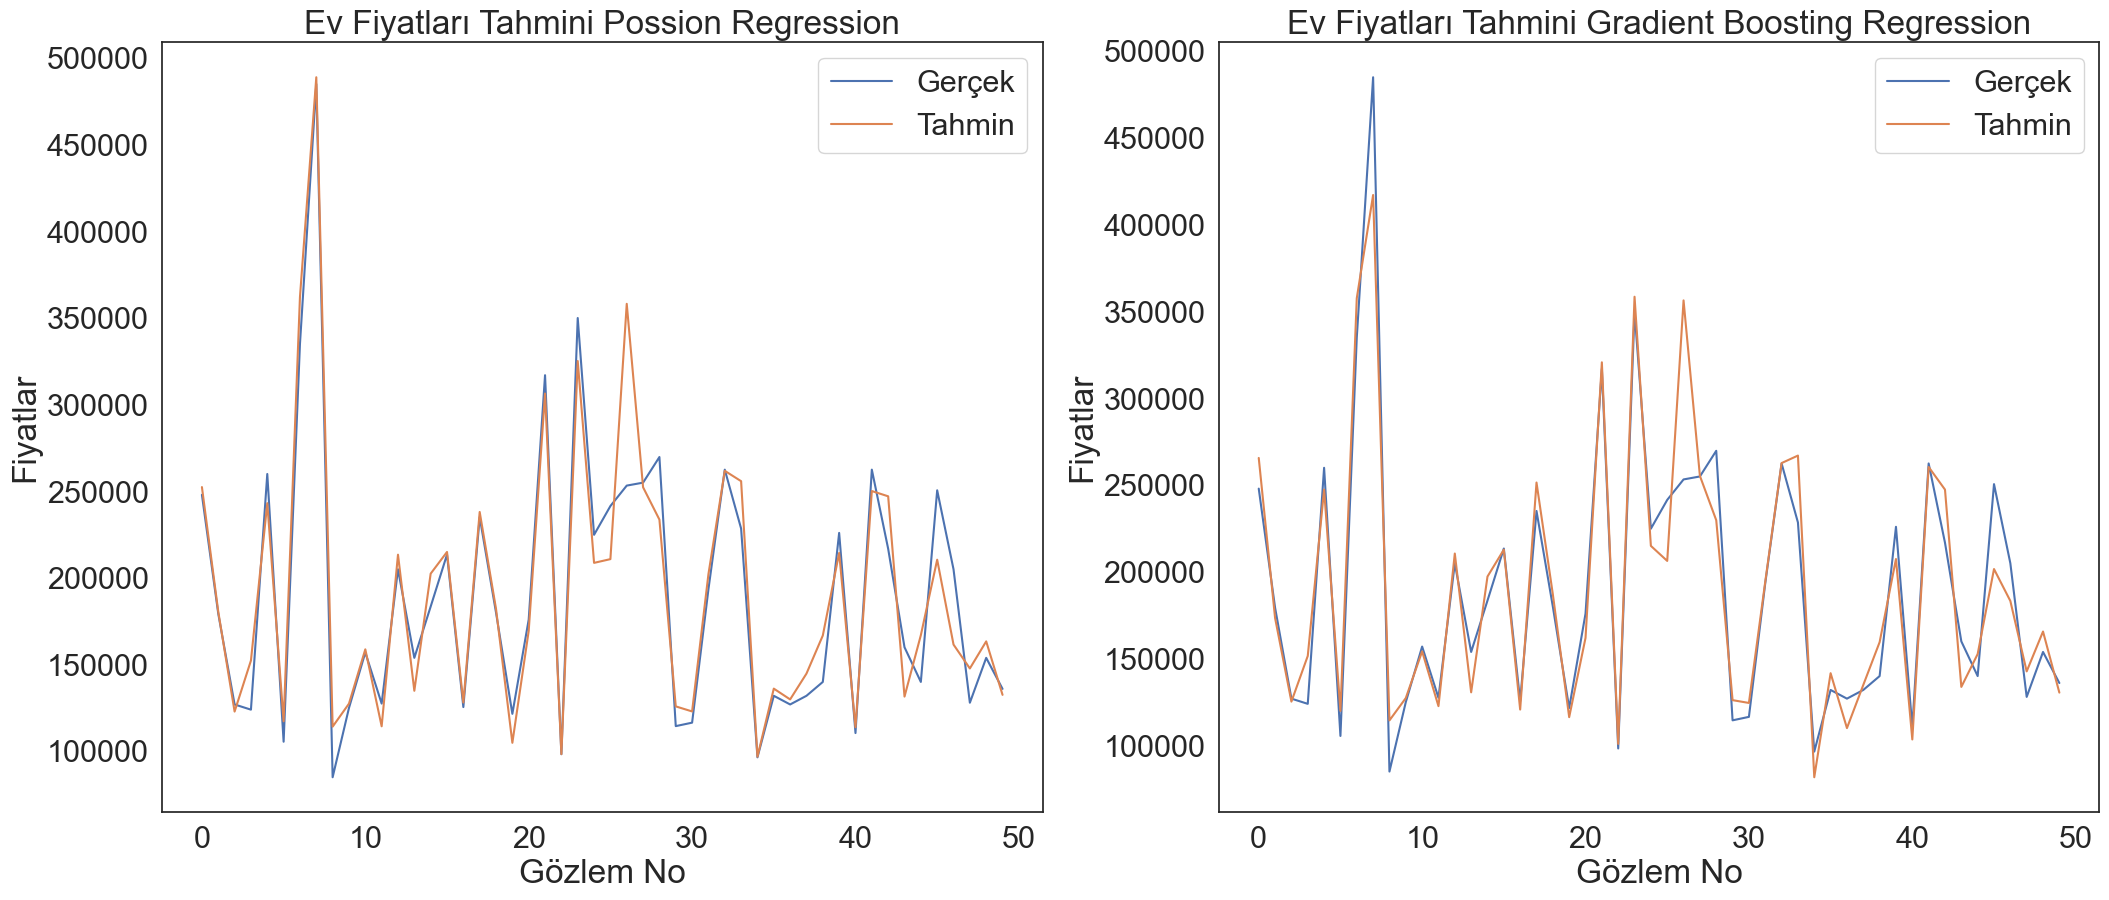

In [93]:
fig,ax=plt.subplots(1,2,figsize=(25,10))
ax[0].plot(range(len(y_val[:50])),y_val[:50],label="Gerçek")
ax[0].plot(range(len(y_val[:50])),possion_optimize_tahmin[:50],label="Tahmin")
ax[0].set_title("Ev Fiyatları Tahmini Possion Regression")
ax[0].set_ylabel("Fiyatlar")
ax[0].set_xlabel("Gözlem No")
ax[0].legend()
ax[1].plot(range(len(y_val[:50])),y_val[:50],label="Gerçek")
ax[1].plot(range(len(y_val[:50])),boost_optimize_tahmin[:50],label="Tahmin")
ax[1].set_title("Ev Fiyatları Tahmini Gradient Boosting Regression")
ax[1].set_ylabel("Fiyatlar")
ax[1].set_xlabel("Gözlem No")
ax[1].legend()
plt.show()

Possin Regression modeli daha başarılı sonuçlar verdi. Optimizasyon sonrası RMSE'de ufak bir miktar düşüş sağlandı. Şimdi test setinde yer alan açıklayıcı değikenleri kullanarak ev satış fiyatlarını tahmin edelim:

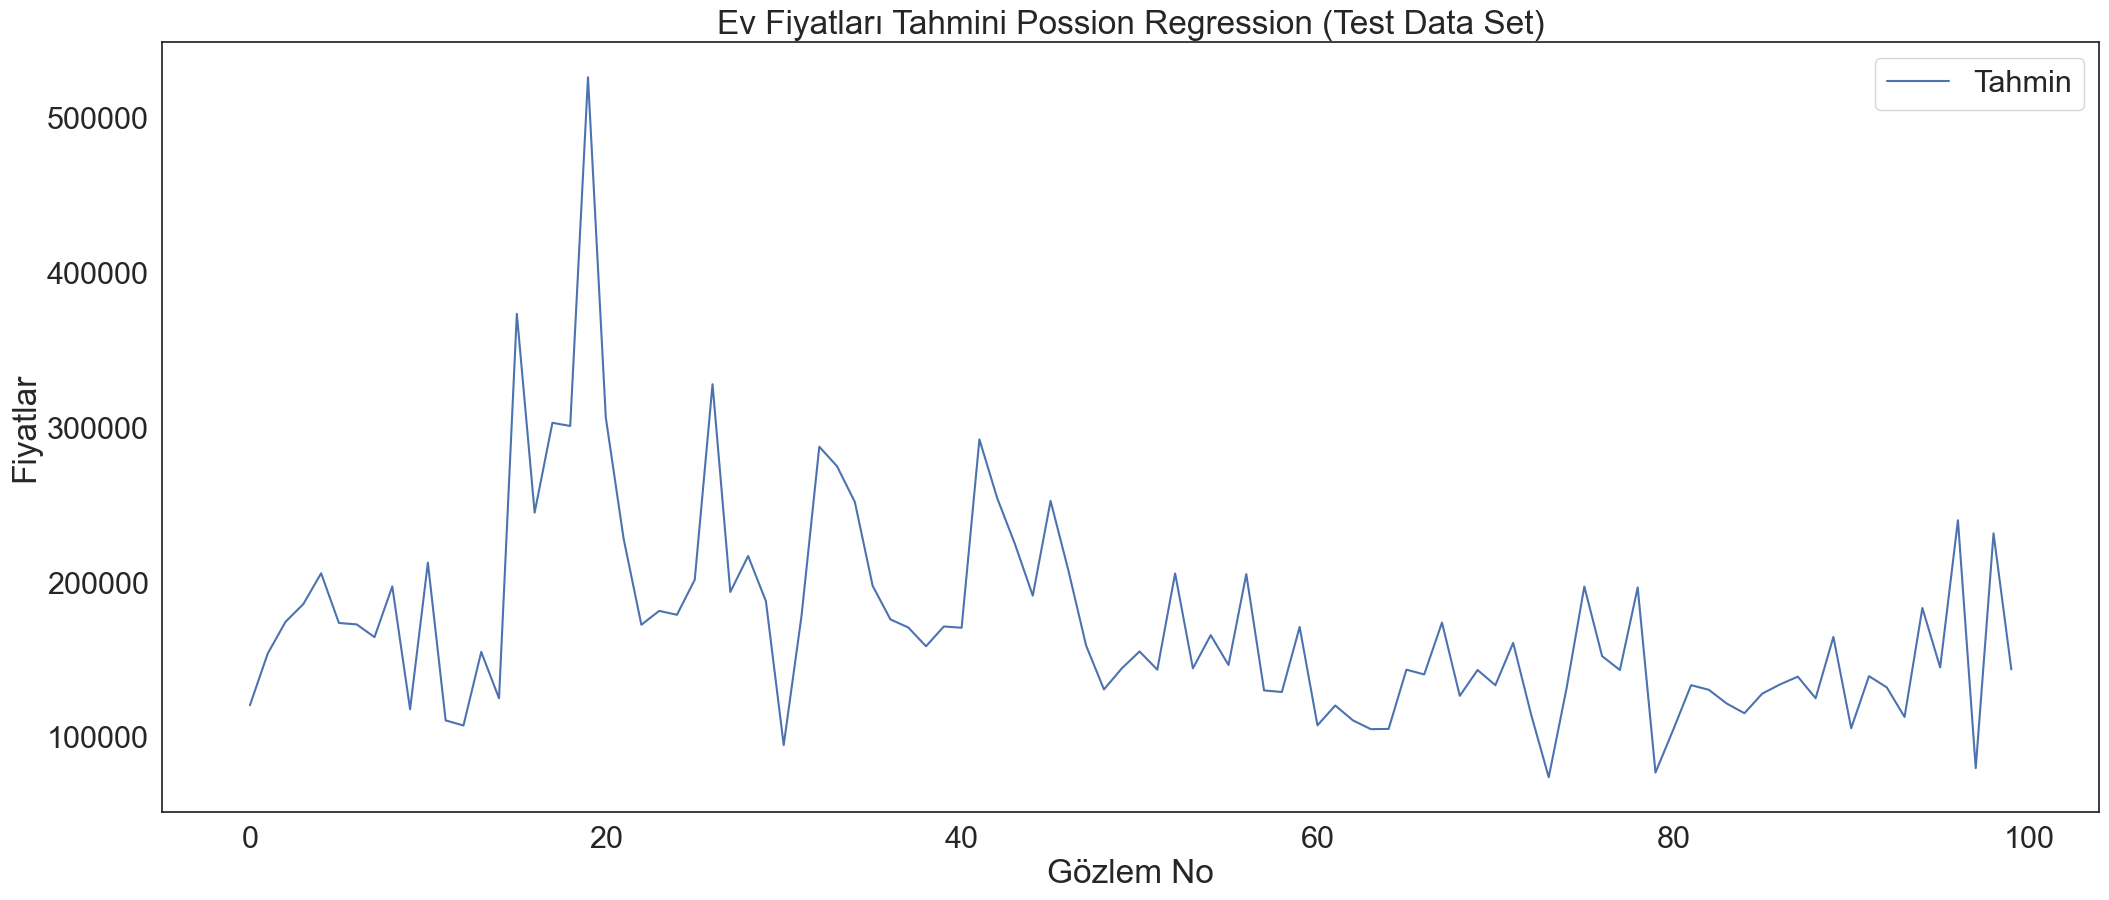

In [96]:
possion_regressor_model=PoissonRegressor(alpha=19,max_iter=100)
possion_regressor_model.fit(X_train,y_train)
possion_regressor_tahmin=possion_regressor_model.predict(X_test)

plt.figure(figsize=(25,10))
plt.plot(range(len(y_val[:100])),possion_regressor_tahmin[:100],label="Tahmin")
plt.title("Ev Fiyatları Tahmini Possion Regression (Test Data Set)")
plt.ylabel("Fiyatlar")
plt.xlabel("Gözlem No")
plt.legend()
plt.show()

<b> Modeli Kaydetme <b/>

In [97]:
import pickle

In [98]:
model_dosyasi="evfiyattahmini_mlr_modeli.pickle"
pickle.dump(possion_regressor_model,open(model_dosyasi,"wb"))